<img src = "logos.png" width = 600, align = "center">
<br>
<h1 align=center>Apprentissage supervisé : Classification</h1>


Nous allons voir la classification dans une population virtuelle à deux dimensions. Les données utilisées seront, dans ce cas, générées par la fonction ``make_blobs``.

Il s’agit d’une fonction de génération de clusters…[Lire plus](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

X, Y = make_blobs(centers=2, random_state=0)

print('X : nb_echantillons x nb_caracteristiques:', X.shape)
print('Y : nb_echantillons:', Y.shape)

print('\nLes 5 premiers échantillons :\n', X[:5, :])
print('\nLes 5 premiers labels :', Y[:5])

X : nb_echantillons x nb_caracteristiques: (100, 2)
Y : nb_echantillons: (100,)

Les 5 premiers échantillons :
 [[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]

Les 5 premiers labels : [1 1 0 0 1]


Comme ces données sont en deux dimensions, nous pouvons représenter chaque échantillon par un point dans le plan, sa première caractéristique étant l’abscisse du point, la deuxième son ordonnée.

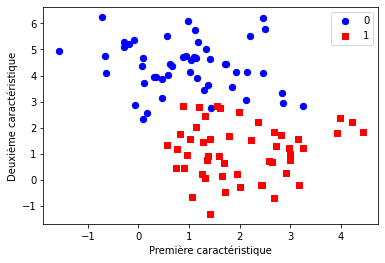

In [2]:
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], 
            color='blue', s=40, label='0')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], 
            color='red', s=40, label='1', marker='s')

plt.xlabel('Première caractéristique')
plt.ylabel('Deuxième caractéristique')
plt.legend(loc='upper right');

La classification est un processus supervisé et pour mesurer sa performance nous allons découper nos données en deux parties :
1.	75 % destines à l’apprentissage.
2.	25 % pour le test et l’évaluation du modèle.


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=Y)

Chaque algorithme de scikit-learn est exposé via un objet ``Estimator``. (Tous les modèle de scikit-learn implémentent la même interface interface).
API Estimator (source : https://www.oreilly.com/ideas/intro-to-scikit-learn)
Communément, les étapes d’utilisation de l’API estimator dans Scikit-Learn sont les suivantes :
1.	Choix d’un modèle et importation de la classe correspondante depuis Scikit-Learn.
2.	Choix des hyperparamètres du modèle et instanciation de la classe avec les valeurs choisies.
3.	Organiser les données dans une matrice de caractéristiques et un vecteur cible.
4.	Adapter le modèle aux données en utilisant la méthode fit() .
5.	Utiliser le modèle sur des Nouvelles donnée :
<ul>
<li>Pour de l’apprentissage supervisé les labels des données inconnues sont souvent prédits avec la méthode predict().</li>
<li>Pour de l’apprentissage non supervisé les propriétés sont souvent transformées ou inférées en utilisant la méthode transform() ou predict().</li>
</ul>

Importons, par exemple, la classe de régression logistique.


In [21]:
from sklearn.linear_model import LogisticRegression

L’étape suivante consiste en une instanciation de l’objet estimator.

In [22]:
modele = LogisticRegression()

In [23]:
X_train.shape

(75, 2)

In [24]:
Y_train.shape

(75,)

On appellee la méthode ``fit()`` en lui passant les données d’apprentissage X_train et Y_train

In [25]:
m = modele.fit(X_train, Y_train)
m.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

**Remarque : **
Certaines méthodes d’estimator comme ``fit()`` retourne ``self`` par défaut. Ainsi, après l’exécution du code ci-dessus c’est l’instance de la classe avec les paramètres par défaut qui sont affichés.
Il est possible de récupérer ces paramètres en utilisant la méthode ``get_params()``, qui retournera un dictionnaire de paramètres.

Le modèle peut alors être appliqué aux données inconnues et l’utiliser pour prédire la sortie correspondante : 

In [26]:
prediction = modele.predict(X_test)

Nous pouvons comparer les labels prédits aux vrais :

In [27]:
print(prediction)
print(Y_test) #on voit qu'il fait 1 faute

[1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1]
[1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1]


L’évaluation du modèle de classification se fait par la mesure de la fraction de prédiction correcte : c’est la “precision” du modèle **(accuracy) :**

In [28]:
np.mean(prediction == Y_test) #représente le taux de réussite sur le test final

0.96

Il existe également une fonction, ``score``, que tout classifieur de scikit-learn peut appliquer aux données de test :

In [29]:
modele.score(X_test, Y_test) #représente le taux de réussite sur le test final

0.96

Il est souvent utile de comparer les performances de généralisation et celle de l’apprentissage :

In [30]:
modele.score(X_train, Y_train) #si il ya sur apprentissage on serait à 1, représente le taux de réussite sur l'apprentissage

0.9333333333333333

La régression logistique est un modèle dit linéaire, ce qui implique qu’il va créer un outil de decision linéaire dans le plan des données d’entrée. En 2 dimensions, cela veut simplement dire que le modèle va tracer une droite qui sépare le “bleu” du “rouge” :

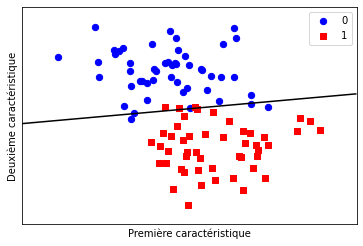

In [31]:
from figures import plot_2d_separator

plt.scatter(X[Y == 0, 0], X[Y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel('Première caractéristique')
plt.ylabel('Deuxième caractéristique')
plot_2d_separator(modele, X)
plt.legend(loc='upper right');

**Paramètres de régression :** Tous les paramètres du modèle sont des attributs de l’objet estimator se terminant par un underscore. Voici les coefficients de la droite obtenue :

In [36]:
print(modele.coef_)
print(modele.intercept_)

[[ 0.37276445 -2.25942572]]
[5.69346378]


In [37]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test, prediction))

[[12  1]
 [ 0 12]]


In [38]:
confusion = metrics.confusion_matrix(Y_test, prediction)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [39]:
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 12
True Negatives: 12
False Positives: 1
False Negatives: 0


### Exercice : Affaires conjugales